In [8]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from matplotlib.pyplot import figure
import pandas as pd
from scipy import integrate
import numpy.matlib
from scipy.optimize import curve_fit
from scipy.stats import norm
import statistics
  
from operator import add
plt.style.use("seaborn-v0_8-white")
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['xtick.minor.size'] = 5
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 5


#### OD to concentration calibration 

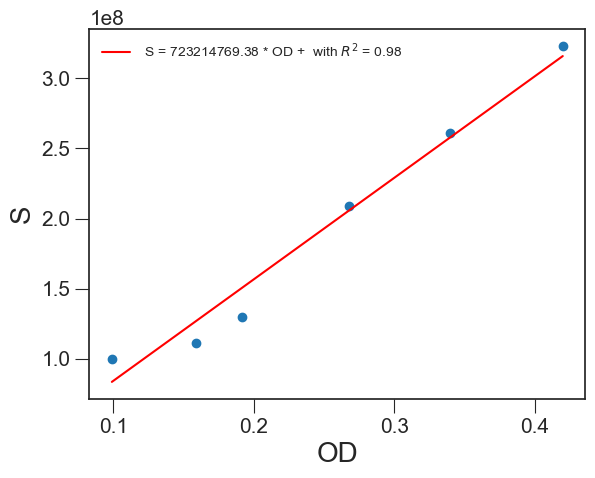

In [9]:
def func(x, a):
    return a * x + (1.2*10**7)
OD = np.array( [0.099,
0.159,
0.192,
0.268,
0.34,
0.42,])
S = np.array([9.97E+07,
1.11E+08,
1.30E+08,
2.09E+08,
2.61E+08,
3.23E+08])
plt.scatter(OD,S)
plt.xlabel('OD')
plt.ylabel('S')
x=OD
y=S
popt, pcov = curve_fit(func, x, y)

residuals = y- func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
                 
plt.plot(x, func(x, *popt), 'r-', label= " S = " +str(round(popt[0],2)) + ' * OD + '+  r' with $R^{2}$ = ' + str(round(r_squared,2)) )
plt.legend()
xx=np.array(x[1:len(x)-1]) # your list of values goes in there

## Applying calibration conversion function to get infection curves in terms of concentration

Text(0.5, 0, 'Time(hours)')

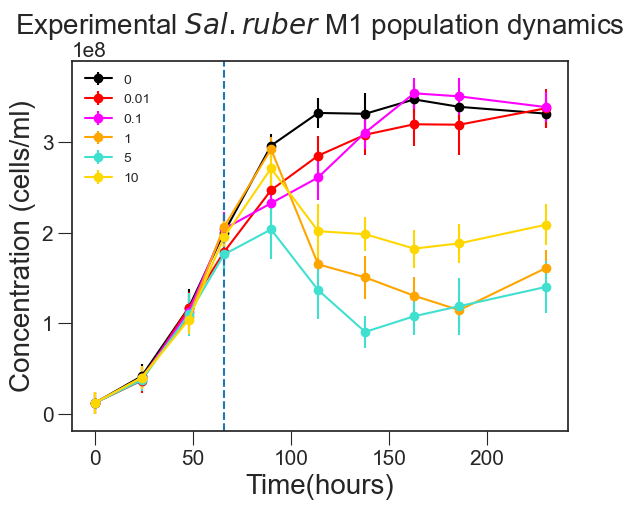

In [10]:
colors = ['red','fuchsia','orange','turquoise','gold']

OD_data =[ 0,0.041,0.145666667,0.260333333,0.393333333,0.443333333,0.442,0.464,0.452666667,0.442333333]
error_0 = [0,
0.001732051,
0.01134803,
0.014518188,
0.001763834,
0.006565905,
0.015011107,
0.007571878,
0.002403701,
0.004484541]

OD_data_001 =[0,0.034333333,0.145666667,0.230666667,0.325333333,0.378,0.41,0.426,0.425333333,0.450333333]
error_001 = [0,
0.002333333,
0.006741249,
0.007535103,
0.012719189,
0.014,
0.013856406,
0.017009801,
0.02944675,
0.01299145,
]
OD_data_01 = [0,0.038,0.139666667,0.266,0.305333333,0.344666667,0.413333333,0.473333333,0.468666667,0.452333333]
error_01 =[0,
0.002081666,
0.01065103,
0.008962886,
0.005333333,
0.018487233,
0.008353309,
0.006666667,
0.011623731,
0.006385748
]

OD_data_1 = [0,0.039,0.131,0.269,0.388,0.212,0.192,0.164,0.142,0.206]
error_1 = [0,
0.001,
0.005897269,
0.002962731,
0.001763834,
0.011718931,
0.016384274,
0.012346839,
0.007571878,
0.011170397
]


OD_data_5= [0,0.035,0.135333333,0.227,0.265333333,0.172666667,0.108666667,0.132666667,0.148,0.177333333]
error_5 = [0,
0.00057735,
0.016505891,
0.008717798,
0.029310597,
0.028339215,
0.00851143,
0.011794537,
0.027153882,
0.022430138
]

OD_data_10 =[0,0.038666667,0.127333333,0.253333333,0.358666667,0.262666667,0.258,0.236,0.244,0.272333333]
error_10 = [0,
0.000881917,
0.004977728,
0.014903393,
0.023132469,
0.024828299,
0.0090185,
0.012489996,
0.012858201,
0.014621141
]


t = [0,24,48,66,90,114,138,163,186,230]
x1=t
y1=OD_data
MOI_vals_labels = [0,0.01,0.1,1,5,10]

OD_data_err = np.array(error_0)
OD_data_err_001 = np.array(error_001)
OD_data_err_01 = np.array(error_01)
OD_data_err_1 = np.array(error_1)
OD_data_err_5 = np.array(error_5)
OD_data_err_10 = np.array(error_10)

S_control_error = func(OD_data_err, *popt)
S_error_001 = func(OD_data_err_001, *popt)
S_error_01 = func(OD_data_err_01, *popt)
S_error_1 = func(OD_data_err_1, *popt)
S_error_5 = func(OD_data_err_5, *popt)
S_error_10 = func(OD_data_err_10, *popt)

OD_data_arr = np.array(OD_data)
S_control_data = func(OD_data_arr, *popt)
plt.errorbar(x1,S_control_data,S_control_error,marker='o', color = 'black')

OD_data_001 = np.array(OD_data_001)
data_001=func(OD_data_001, *popt)
plt.errorbar(x1,data_001,S_error_001,marker='o', color = colors[0])

OD_data_01 = np.array(OD_data_01)
data_01=func(OD_data_01, *popt)
plt.errorbar(x1,data_01,S_error_01,marker='o', color = colors[1])


OD_data_1 = np.array(OD_data_1)
data_1=func(OD_data_1, *popt)
plt.errorbar(x1,data_1,S_error_1,marker='o', color = colors[2])


OD_data_5 = np.array(OD_data_5)
data_5=func(OD_data_5, *popt)
plt.errorbar(x1,data_5,S_error_5,marker='o',color = colors[3])



OD_data_10 = np.array(OD_data_10)
data_10=func(OD_data_10, *popt)
plt.errorbar(x1,data_10,S_error_10,marker='o', color = colors[4])



plt.title(r'Experimental $\it{Sal.ruber}$ M1 population dynamics', fontsize = 20)
plt.legend(MOI_vals_labels)
plt.axvline(66, linestyle = '--')
plt.ylabel('Concentration (cells/ml)')
plt.xlabel('Time(hours)')

## Main ODE Model (Split)

In [11]:
def Model_2(y,t,pars):
    if pars['n'] == 0:
        return ('Need n>0 classes')
    if pars['n'] == 1:
        dy= np.zeros(5)
        R = y[0]
        S = y[1]
        E = y[2]
        I = y[3]
        V = y[4]
        
        psy_R = pars['mu_max'] * (R/(R+pars['R_in']))
        psy_R_dim = (R/(R+pars['sens']*pars['R_in']))/(pars['R0']/(pars['R0']+pars['sens']*pars['R_in']))
        #psy_R_dim =1
        
        dy[0] = pars['J'] - pars['e']* psy_R*(S+E) #R
        dy[1] = psy_R * S  - pars['phi'][0] * S* V +psy_R*E + psy_R*I #S
        dy[2] = pars['phi'][0] * S* V  - pars['lam'][0]*E  #E
        dy[3] = pars['lam'][0]*E - psy_R_dim*(pars['eta'] * I) #I
        dy[4] = psy_R_dim*(pars['bet']*pars['eta'] * I) - (pars['phi'][0]*S + pars['phi'][0]*E)* V #V
        
        return dy  
    else:
        dy = np.zeros(2*pars['n']+3)
        R = y[0]
        S = y[1]
        E_1 = y[2]
        E_s = y[3:(pars['n']+1)]
        E_k = y[pars['n'] + 1]
        I_1 = y[pars['n']+2]
        I_s = y[(pars['n']+3):(2*pars['n']+1)]
        I_k = y[2*pars['n'] + 1]
        V = y[2*pars['n'] + 2]


        
        #burst_viruses = []

        E_prev = np.concatenate((E_1 ,  E_s[0:-1]), axis = None)
        E_total = np.concatenate((E_1 ,  E_s, E_k), axis = None)
        
        E_sum = np.sum(E_total)
        
        I_prev = np.concatenate((I_1 ,  I_s[0:-1]), axis = None)
        I_total = np.concatenate((I_1 ,  I_s, I_k), axis = None)
        
        I_sum = np.sum(I_total)
     
        
        #N = np.sum(S) + np.sum(I) + np.sum(E_total) + np.sum(L)
        #R0 = 500
 
        psy_R = pars['mu_max'] * (R/(R+pars['R_in']))
        psy_R_dim = (R/(R+pars['sens']*pars['R_in']))/(pars['R0']/(pars['R0']+pars['sens']*pars['R_in']))
        #psy_R_dim = 1
        #print(E[0:pars['n']-1])
        E_topmid = np.concatenate((E_1 ,  E_s), axis = None)
        I_topmid = np.concatenate((I_1 ,  I_s), axis = None)
  
        
        
        lam_sum = np.sum(pars['lam'])


        dy[0] = pars['J'] - pars['e']* psy_R*(S +(1/(1-pars['alpha_p'])) * ((np.sum(E_total))+np.sum(I_total))) - pars['dR'] * R #R
        

        dy[1] = psy_R * S  - pars['phi'][0]  * S* V   + 2* psy_R * np.sum(1/(1-pars['alpha_p']) * (pars['fin'][0]*E_total)) + 2* psy_R * np.sum(1/(1-pars['alpha_p']) * (pars['fin'][0]*I_total)) - pars['dS']*S # S
    
        #print(pars['fin'][0])
        #print('woo1')
        #print((E_total))
        #print('woo2')
        #print(np.sum(pars['fin'][0]*E_total))
        #print('woo3')
        dy[2] = pars['phi'][0] * S * V - pars['phi'][1] * E_1 * V  -  (pars['lam'][0] * E_1) - (psy_R)*E_1 + 1/(1-pars['alpha_p'])*2*psy_R*np.sum(pars['fin'][0]*(E_total), axis = 0)-  pars['dE'] * E_1  #E_1

        dy[3:(pars['n']+1)]  = pars['phi'][1:-2] * E_prev * V - pars['phi'][2:-1] * E_s * V -  (pars['lam'][1:-1] * E_s) -(psy_R)*E_s + 2*psy_R * np.sum(pars['fin'][1:-1]*E_total, axis = 1)/(1-pars['alpha_p'])- pars['dE'] * E_s  # E_s
        
        #print(pars['fin'][1:-1])
        #print('woo1')
        #print(E_total)
        #print('woo2')
        #print( np.sum(pars['fin'][1:-1]*E_total, axis = 1))
        #print('woo3')
        #print(E_total[-2])
        #print(E_topmid[-1])
        #print('trial')
        dy[pars['n']+1]  = pars['phi'][-1] * E_topmid[-1]*V -  (pars['lam'][-1] * E_k) -  (psy_R)*E_k +  psy_R*np.sum(pars['fin'][-1]*(E_k), axis = 0)/(1-pars['alpha_p'])-  pars['dE'] * E_k  #E_K

        dy[pars['n']+2] = pars['lam'][0]*E_1 - psy_R_dim * (pars['eta'] * (I_1)) -  (psy_R)*I_1 + 1/(1-pars['alpha_p'])*2*psy_R*np.sum(pars['fin'][0]*(I_total), axis = 0) #I_1
        
        dy[(pars['n']+3):(2*pars['n']+1)] = (pars['lam'][1:-1] * E_s) - psy_R_dim * (pars['eta'] * (I_s)) - (psy_R)*I_s + 2*psy_R * np.sum(pars['fin'][1:-1]*I_total, axis = 1)/(1-pars['alpha_p']) #I_s
        
        dy[2*pars['n'] + 1]= pars['lam'][-1]*E_k - psy_R_dim * (pars['eta'] * (I_k)) -  (psy_R)*I_k +  psy_R*np.sum(pars['fin'][-1]*(I_k), axis = 0)/(1-pars['alpha_p']) #I_k
        
        dy[2*pars['n']+2] = pars['bet']*psy_R_dim * (pars['eta'] * (I_sum))- V*(pars['phi'][0] * S + np.sum(pars['phi'][2:-1] * E_prev) + pars['phi'][-1] * E_topmid[-1]) - pars['dV'] * V #V
        
 
        
        #print(np.sum(pars['bet']*I*pars['eta']))
        #print(psy_R)
        return dy  

## Split model results after calibrating for varying initial growth of uninfected culture

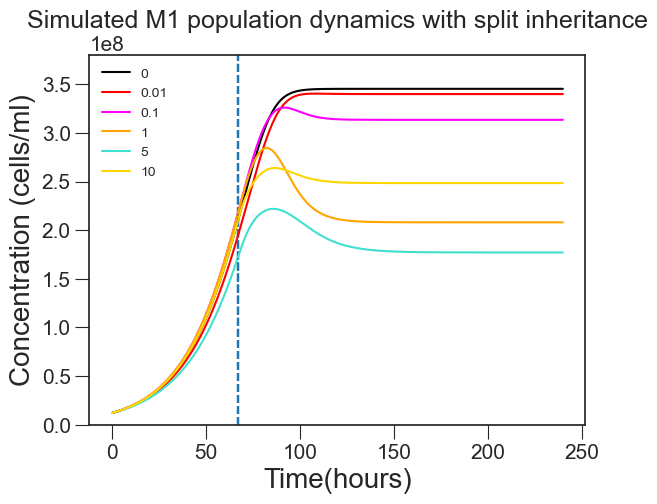

In [17]:
mu_max_vals=[0.06,0.055,0.061,0.061,0.058,0.06]

MOI_vals= [10,5,1,0.1,0.01,0]
colors = ['black','red','fuchsia','orange','turquoise','gold']
mu_max_vals.reverse()
MOI_vals.reverse()
virus_insert_time = 67
for b in range(len(mu_max_vals)):
    pars={}
    pars['n'] = 8
    MOI = np.arange(pars['n']) +1
    vals = np.arange(pars['n']) 
    mat =  [[0]*pars['n']]*pars['n']

    for i in vals:
        for j in vals:
            mat[i][j] = (1/(2+j))
    pars['fin'] = np.triu(mat, k=0)




    pars['e'] = 0.75*10**-7
    pars['mu_max'] =mu_max_vals[b]
    pars['R_in'] =8
    pars['R0'] = 25


    MOI = np.arange(pars['n']) +1 
    q = 0
    pars['q'] = 1-(1-q)**MOI 

    phi_values = []
    eta_values = []
    lam_values = []
    beta_values = []


    lam_initial = 1/6.8
    pars['eta'] = 1/11
    pars['a'] = 1.7
    #MOI = np.linspace(0,pars['n'],1000)

    MOI = np.arange(pars['n']) +1
    #MOI = np.linspace(0,pars['n'],1000)
    for i in MOI:
        lam_value =lam_initial/((pars['a'])**i)
        if 1/lam_value + 1/pars['eta'] < 550:
            lam_values.append(lam_value)
            threshold_lam = lam_value
        else:
            lam_values.append(threshold_lam)

    
    
    phi_initial = 4*10**-10        
    m=(3.4*10**(-12) - 3.4*10**(-10))/10 
    phi_vals = [phi_initial]
    for i in (vals+1):
        phi_vals.append(phi_initial)
    


    #MOI = np.linspace(0,pars['n'],1000)


    pars['sens']= 0.05
    pars['lam'] = lam_values

    pars['dR'] = 0
    pars['dS'] = 0
    pars['dE'] = 0
    pars['dL'] = 0
    pars['dI'] = 0
    pars['dV'] = 0
    pars['bet'] = 10
    pars['phi'] = phi_vals
    pars['alpha_s'] = 0
    pars['J'] = 0 
    pars['res'] =1
    pars['alpha_p'] =0#selective advantage for pseudolysogens in consuming resources

    #print('woo')
    t0 = 0
    tf = virus_insert_time
    tstep = 0.1
    t = np.arange(t0,tf+tstep,tstep)


    y01 = np.zeros(2*pars['n']+3)
    y01[0] = pars['R0'] #initial resource concentration 
    y01[1] = 1.2*10**7 #initial susceptible concentration 
    y01[-1] = 0#initial free virus concentration 
    y1 = integrate.odeint(Model_2,y01,t,atol = 10**-8,args=(pars,))
    R_0 = y1[:,0]
    S_0 = y1[:,1]
    E1_0 = y1[:,2]
    E_mid_0 = y1[:,3:(pars['n']+1)]
    E_final_0 = y1[:,(pars['n']+1)]
    I1_0 = y1[:,pars['n']+2]
    I_mid_0 = y1[:,(pars['n']+3):(2*pars['n']+1)]
    I_final_0 = y1[:,2*pars['n'] + 1]
    V=y1[:,(2*pars['n']+2)]


    #plt.semilogy(t,E1)
    #plt.semilogy(t, E_mid )
    #plt.semilogy(t,E_final)
    E_total_mid_0 = np.sum(E_mid_0, axis = 1)
    I_total_mid_0 = np.sum(I_mid_0, axis = 1)
    E_total_0 = np.sum([E1_0,E_total_mid_0,E_final_0], axis = 0)


    I_total_0 = np.sum([I1_0,I_total_mid_0,I_final_0], axis = 0)






    host_pop_0 = S_0 + E_total_0 + I_total_0
    plt.ylabel('Concentration (cells/ml)')
    plt.xlabel('Time(hours)')

    plt.title('S+E+I+L')
    plt.axvline(virus_insert_time, linestyle = '--')
    Virus = []
    S_total= []
    E_total= []
    I_total= []
    V_total = []
    L_total = []
    R_total = []
    Actual_MOI_vals = []
    MOI_vals_solo = [10]
    #print(E_total_0[-1]/2)
    S_final=[]
    E1_final=[]
    Emid_final=[]
    Ek_final=[]
    R_final=[]
    I_final=[]
    V_final = []
    totalpop_final = []
    E_dist_final=[]
    plt.plot(t,host_pop_0, color = colors[b])
Virus = []
S_total= []
E_total= []
I_total= []
V_total = []
L_total = []
R_total = []
Actual_MOI_vals = []
MOI_vals_solo = [10]
#print(E_total_0[-1]/2)
S_final=[]
E1_final=[]
Emid_final = []
Ek_final = []
R_final=[]
I1_final=[]
Imid_final = []
Ik_final = []
V_final = []
totalpop_final = []
E_dist_final=[]
I_dist_final=[]
for a in range(len(mu_max_vals)):
   
    pars={}
    pars['n'] = 8
    MOI = np.arange(pars['n']) +1
    vals = np.arange(pars['n']) 
    mat =  [[0]*pars['n']]*pars['n']

    for i in vals:
        for j in vals:
            mat[i][j] = (1/(2+j))
    pars['fin'] = np.triu(mat, k=0)





    phi_vals
    pars['e'] = 0.75*10**-7
    pars['mu_max'] = mu_max_vals[a]
    pars['R_in'] =8
    pars['R0'] = 25


    MOI = np.arange(pars['n']) +1 
    q = 0
    pars['q'] = 1-(1-q)**MOI 

    phi_values = []
    eta_values = []
    lam_values = []
    beta_values = []


    lam_initial = 1/6.8
    pars['eta'] = 1/11
    pars['a'] = 1.7
    #MOI = np.linspace(0,pars['n'],1000)
    for i in MOI:
        lam_value =lam_initial/(((pars['a'])**(i)))
        #lam_value = lam_initial
        if 1/lam_value + 1/pars['eta'] < 550:
            lam_values.append(lam_value)
            threshold_lam = lam_value
        else:
            lam_values.append(threshold_lam)
    phi_initial = 4*10**-10        
    m=(3.4*10**(-12) - 3.4*10**(-10))/10 
    phi_vals = [phi_initial]
    for i in (vals+1):
        phi_vals.append(phi_initial)


    #MOI = np.linspace(0,pars['n'],1000)


    pars['sens']= 0.05
    pars['lam'] = lam_values
    pars['dR'] = 0
    pars['dS'] = 0
    pars['dE'] = 0
    pars['dL'] = 0
    pars['dI'] = 0
    pars['dV'] = 0
    pars['bet'] = 10
    pars['phi'] = phi_vals
    pars['alpha_s'] = 0
    pars['J'] = 0 
    pars['res'] =1
    pars['alpha_p'] =0#selective advantage for pseudolysogens in consuming resources

    Real_Virus_MOI=[]



    #####







   
    #print(host_pop)
    #print(P_total)


    #print('woo')
    t0 = 0
    tf = virus_insert_time
    tstep = 0.1
    t = np.arange(t0,tf+tstep,tstep)


    y01 = np.zeros(2*pars['n']+3)
    y01[0] = pars['R0'] #initial resource concentration 
    y01[1] = 1.2*10**7 #initial susceptible concentration 
    y01[-1] = 0#initial free virus concentration 
    y1 = integrate.odeint(Model_2,y01,t,atol = 10**-8,args=(pars,))
    R_0 = y1[:,0]
    S_0 = y1[:,1]
    E1_0 = y1[:,2]
    E_mid_0 = y1[:,3:(pars['n']+1)]
    E_final_0 = y1[:,(pars['n']+1)]
    I1_0 = y1[:,pars['n']+2]
    I_mid_0 = y1[:,(pars['n']+3):(2*pars['n']+1)]
    I_final_0 = y1[:,2*pars['n'] + 1]
    V=y1[:,(2*pars['n']+2)]

    #plt.semilogy(t,E1)
    #plt.semilogy(t, E_mid )
    #plt.semilogy(t,E_final)
    E_total_mid_0 = np.sum(E_mid_0, axis = 1)
    I_total_mid_0 = np.sum(I_mid_0, axis = 1)
    E_total_0 = np.sum([E1_0,E_total_mid_0,E_final_0], axis = 0)


    I_total_0 = np.sum([I1_0,I_total_mid_0,I_final_0], axis = 0)






    host_pop_0 = S_0 + E_total_0 + I_total_0
    plt.ylabel('Concentration (cells/ml)')
    plt.xlabel('Time(hours)')

    plt.title('S+E+I+L')
    #plt.axvline(virus_insert_time, linestyle = '--')

    t0 = virus_insert_time
    tf = 240
    tstep = 0.1
    t = np.arange(t0,tf+tstep,tstep)


    y01 = np.zeros(2*pars['n']+3)
    BULK_MOI  = MOI_vals[a]
    y01[0] = R_0[-1] #initial resource concentration 
    y01[1] = S_0[-1] #initial susceptible concentration 
    y01[-1] = BULK_MOI * y01[1] #initial free virus concentration 
    #print( y01[1])
    #print(MOI_vals[i])
    y1 = integrate.odeint(Model_2,y01,t,atol = 10**-8,args=(pars,))
    
    R3= y1[:,0]
    S3 = y1[:,1]
    E13 = y1[:,2]
    E_mid3 = y1[:,3:(pars['n']+1)]
    E_final3 = y1[:,(pars['n']+1)]
    I13 = y1[:,pars['n']+2]
    I_mid3 = y1[:,(pars['n']+3):(2*pars['n']+1)]
    I_final3 = y1[:,2*pars['n'] + 1]
    V3=y1[:,(2*pars['n']+2)]

    #plt.semilogy(t,E1)
    #plt.semilogy(t, E_mid )
    #plt.semilogy(t,E_final)
    E_total_mid3 = np.sum(E_mid3, axis = 1)
    I_total_mid3 = np.sum(I_mid3, axis = 1)
    E_total3 = np.sum([E13,E_total_mid3,E_final3], axis = 0)


    I_total3 = np.sum([I13,I_total_mid3,I_final3], axis = 0)






    host_pop3 = S3 + E_total3 + I_total3
    

    S_final.append(S3[-1])
    E1_final.append(E13[-1])
    Emid_final.append(E_mid3[-1])
    Ek_final.append(E_final3[1])
    I1_final.append(I13[-1])
    Imid_final.append(I_mid3[-1])
    Ik_final.append(I_final3[1])
    V_final.append(V3[-1])
    R_final.append(R3[-1])
    

    totalpop_final.append(host_pop3[-1])

    Actual_MOI = round( y01[-1]/y01[1],3)
    Actual_MOI_vals.append(Actual_MOI)
    plt.plot(t,host_pop3, color = colors[a], label = str(BULK_MOI))
    plt.ylabel('Concentration (cells/ml)')
    plt.xlabel('Time(hours)')
    plt.title(r'Simulated M1 population dynamics with split inheritance', fontsize = 18)
    S_total.append(S3)
    E_total.append(E_total3)
    I_total.append(I_total3)
    V_total.append(V3)
    R_total.append(R3)
    E_dist=[]
    E_dist.append(E13[-1])
    for a in range(len(E_mid3[0])):
        E_dist.append(E_mid3[:,a][-1])
    E_dist.append(E_final3[-1])
    E_dist_final.append(E_dist) 
    
    I_dist=[]
    I_dist.append(I13[-1])
    for b in range(len(I_mid3[0])):
        I_dist.append(I_mid3[:,b][-1])
    I_dist.append(I_final3[-1])
    I_dist_final.append(I_dist) 
    
    plt.legend()
plt.ylim(0,3.8*10**8)
##plt.savefig('Final_result_split.svg', bbox_inches = "tight")
plt.show()





## Main ODE Model (Binary)

In [13]:
def Model_3(y,t,pars):
    if pars['n'] == 0:
        return ('Need n>0 classes')
    if pars['n'] == 1:
        dy= np.zeros(5)
        R = y[0]
        S = y[1]
        E = y[2]
        I = y[3]
        V = y[4]
        
        psy_R = pars['mu_max'] * (R/(R+pars['R_in']))
        psy_R_dim = (R/(R+pars['sens']*pars['R_in']))/(pars['R0']/(pars['R0']+pars['sens']*pars['R_in']))
        #psy_R_dim =1
        
        dy[0] = pars['J'] - pars['e']* psy_R*(S+E) #R
        dy[1] = psy_R * S  - pars['phi'][0] * S* V +psy_R*E + psy_R*I #S
        dy[2] = pars['phi'][0] * S* V  - pars['lam'][0]*E  #E
        dy[3] = pars['lam'][0]*E - psy_R_dim*(pars['eta'] * I) #I
        dy[4] = psy_R_dim*(pars['bet']*pars['eta'] * I) - (pars['phi'][0]*S + pars['phi'][0]*E)* V #V
        
        return dy  
    else:
        dy = np.zeros(2*pars['n']+3)
        R = y[0]
        S = y[1]
        E_1 = y[2]
        E_s = y[3:(pars['n']+1)]
        E_k = y[pars['n'] + 1]
        I_1 = y[pars['n']+2]
        I_s = y[(pars['n']+3):(2*pars['n']+1)]
        I_k = y[2*pars['n'] + 1]
        V = y[2*pars['n'] + 2]


        
        #burst_viruses = []

        E_prev = np.concatenate((E_1 ,  E_s[0:-1]), axis = None)
        E_total = np.concatenate((E_1 ,  E_s, E_k), axis = None)
        
        E_sum = np.sum(E_total)
        
        I_prev = np.concatenate((I_1 ,  I_s[0:-1]), axis = None)
        I_total = np.concatenate((I_1 ,  I_s, I_k), axis = None)
        
        I_sum = np.sum(I_total)
     
        
        #N = np.sum(S) + np.sum(I) + np.sum(E_total) + np.sum(L)
        #R0 = 500
 
        psy_R = pars['mu_max'] * (R/(R+pars['R_in']))
        psy_R_dim = (R/(R+pars['sens']*pars['R_in']))/(pars['R0']/(pars['R0']+pars['sens']*pars['R_in']))
        #psy_R_dim = 1
        #print(E[0:pars['n']-1])
        E_topmid = np.concatenate((E_1 ,  E_s), axis = None)
        
  
        
        
        lam_sum = np.sum(pars['lam'])


        dy[0] = pars['J'] - pars['e']* psy_R*(S +(1/(1-pars['alpha_p'])) * (np.sum(E_total))+np.sum(I_total)) - pars['dR'] * R #R
        

        dy[1] = psy_R * S  - pars['phi'][0]  * S* V   + psy_R * np.sum(1/(1-pars['alpha_p']) * (E_total)) + psy_R * np.sum(1/(1-pars['alpha_p']) * (I_total)) - pars['dS']*S # S
    
        #print(pars['fin'][0])
        #print('woo1')
        #print((E_total))
        #print('woo2')
        #print(np.sum(pars['fin'][0]*E_total))
        #print('woo3')
        dy[2] = pars['phi'][0] * S * V - pars['phi'][1] * E_1 * V  -  (pars['lam'][0] * E_1) -  pars['dE'] * E_1  #E_1

        dy[3:(pars['n']+1)]  = pars['phi'][1:-2] * E_prev * V - pars['phi'][2:-1] * E_s * V -  (pars['lam'][1:-1] * E_s) - pars['dE'] * E_s  # E_s
        
        #print(pars['fin'][1:-1])
        #print('woo1')
        #print(E_total)
        #print('woo2')
        #print( np.sum(pars['fin'][1:-1]*E_total, axis = 1))
        #print('woo3')
        #print(E_total[-2])
        #print(E_topmid[-1])
        #print('trial')
        dy[pars['n']+1]  = pars['phi'][-1] * E_topmid[-1]*V -  (pars['lam'][-1] * E_k) -  pars['dE'] * E_k  #E_K

        dy[pars['n']+2] = pars['lam'][0]*E_1 - psy_R_dim * (pars['eta'] * (I_1))  #I_1
        
        dy[(pars['n']+3):(2*pars['n']+1)] = (pars['lam'][1:-1] * E_s) - psy_R_dim * (pars['eta'] * (I_s))  #I_s
        
        dy[2*pars['n'] + 1]= pars['lam'][-1]*E_k - psy_R_dim * (pars['eta'] * (I_k)) #I_k
        
        dy[2*pars['n']+2] = pars['bet']*psy_R_dim * (pars['eta'] * (I_sum))- V*(pars['phi'][0] * S + np.sum(pars['phi'][2:-1] * E_prev) + pars['phi'][-1] * E_topmid[-1]) - pars['dV'] * V #V
        
 
        
        #print(np.sum(pars['bet']*I*pars['eta']))
        #print(psy_R)
        return dy  

## Binary model results  (Fig S3b)

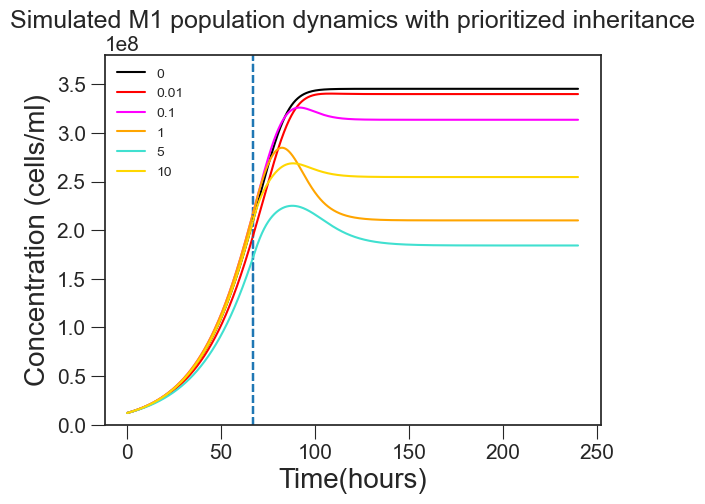

In [16]:
mu_max_vals=[0.06,0.055,0.061,0.061,0.058,0.06]

MOI_vals= [10,5,1,0.1,0.01,0]
colors = ['black','red','fuchsia','orange','turquoise','gold']
mu_max_vals.reverse()
MOI_vals.reverse()
virus_insert_time = 67
for b in range(len(mu_max_vals)):
    pars={}
    pars['n'] = 8
    MOI = np.arange(pars['n']) +1
    vals = np.arange(pars['n']) 
    mat =  [[0]*pars['n']]*pars['n']

    for i in vals:
        for j in vals:
            mat[i][j] = (1/(2+j))
    pars['fin'] = np.triu(mat, k=0)




    pars['e'] = 0.75*10**-7
    pars['mu_max'] =mu_max_vals[b]
    pars['R_in'] =8
    pars['R0'] = 25


    MOI = np.arange(pars['n']) +1 
    q = 0
    pars['q'] = 1-(1-q)**MOI 

    phi_values = []
    eta_values = []
    lam_values = []
    beta_values = []


    lam_initial = 1/6.8
    pars['eta'] = 1/11
    pars['a'] = 1.7
    #MOI = np.linspace(0,pars['n'],1000)

    MOI = np.arange(pars['n']) +1
    #MOI = np.linspace(0,pars['n'],1000)
    for i in MOI:
        lam_value =lam_initial/((pars['a'])**i)
        if 1/lam_value + 1/pars['eta'] < 550:
            lam_values.append(lam_value)
            threshold_lam = lam_value
        else:
            lam_values.append(threshold_lam)

    
    
    phi_initial = 4*10**-10        
    m=(3.4*10**(-12) - 3.4*10**(-10))/10 
    phi_vals = [phi_initial]
    for i in (vals+1):
        phi_vals.append(phi_initial)
    


    #MOI = np.linspace(0,pars['n'],1000)


    pars['sens']= 0.05
    pars['lam'] = lam_values

    pars['dR'] = 0
    pars['dS'] = 0
    pars['dE'] = 0
    pars['dL'] = 0
    pars['dI'] = 0
    pars['dV'] = 0
    pars['bet'] = 10
    pars['phi'] = phi_vals
    pars['alpha_s'] = 0
    pars['J'] = 0 
    pars['res'] =1
    pars['alpha_p'] =0#selective advantage for pseudolysogens in consuming resources

    #print('woo')
    t0 = 0
    tf = virus_insert_time
    tstep = 0.1
    t = np.arange(t0,tf+tstep,tstep)


    y01 = np.zeros(2*pars['n']+3)
    y01[0] = pars['R0'] #initial resource concentration 
    y01[1] = 1.2*10**7 #initial susceptible concentration 
    y01[-1] = 0#initial free virus concentration 
    y1 = integrate.odeint(Model_3,y01,t,atol = 10**-8,args=(pars,))
    R_0 = y1[:,0]
    S_0 = y1[:,1]
    E1_0 = y1[:,2]
    E_mid_0 = y1[:,3:(pars['n']+1)]
    E_final_0 = y1[:,(pars['n']+1)]
    I1_0 = y1[:,pars['n']+2]
    I_mid_0 = y1[:,(pars['n']+3):(2*pars['n']+1)]
    I_final_0 = y1[:,2*pars['n'] + 1]
    V=y1[:,(2*pars['n']+2)]


    #plt.semilogy(t,E1)
    #plt.semilogy(t, E_mid )
    #plt.semilogy(t,E_final)
    E_total_mid_0 = np.sum(E_mid_0, axis = 1)
    I_total_mid_0 = np.sum(I_mid_0, axis = 1)
    E_total_0 = np.sum([E1_0,E_total_mid_0,E_final_0], axis = 0)


    I_total_0 = np.sum([I1_0,I_total_mid_0,I_final_0], axis = 0)






    host_pop_0 = S_0 + E_total_0 + I_total_0
    plt.ylabel('Concentration (cells/ml)')
    plt.xlabel('Time(hours)')

    plt.title('S+E+I+L')
    plt.axvline(virus_insert_time, linestyle = '--')
    Virus = []
    S_total= []
    E_total= []
    I_total= []
    V_total = []
    L_total = []
    R_total = []
    Actual_MOI_vals = []
    MOI_vals_solo = [10]
    #print(E_total_0[-1]/2)
    S_final=[]
    E1_final=[]
    Emid_final=[]
    Ek_final=[]
    R_final=[]
    I_final=[]
    V_final = []
    totalpop_final = []
    E_dist_final=[]
    plt.plot(t,host_pop_0, color = colors[b])
Virus = []
S_total= []
E_total= []
I_total= []
V_total = []
L_total = []
R_total = []
Actual_MOI_vals = []
MOI_vals_solo = [10]
#print(E_total_0[-1]/2)
S_final=[]
E1_final=[]
Emid_final = []
Ek_final = []
R_final=[]
I1_final=[]
Imid_final = []
Ik_final = []
V_final = []
totalpop_final = []
E_dist_final=[]
I_dist_final=[]
for a in range(len(mu_max_vals)):
   
    pars={}
    pars['n'] = 8
    MOI = np.arange(pars['n']) +1
    vals = np.arange(pars['n']) 
    mat =  [[0]*pars['n']]*pars['n']

    for i in vals:
        for j in vals:
            mat[i][j] = (1/(2+j))
    pars['fin'] = np.triu(mat, k=0)





    phi_vals
    pars['e'] = 0.75*10**-7
    pars['mu_max'] = mu_max_vals[a]
    pars['R_in'] =8
    pars['R0'] = 25


    MOI = np.arange(pars['n']) +1 
    q = 0
    pars['q'] = 1-(1-q)**MOI 

    phi_values = []
    eta_values = []
    lam_values = []
    beta_values = []


    lam_initial = 1/6.8
    pars['eta'] = 1/11
    pars['a'] = 1.7
    #MOI = np.linspace(0,pars['n'],1000)
    for i in MOI:
        lam_value =lam_initial/(((pars['a'])**(i)))
        #lam_value = lam_initial
        if 1/lam_value + 1/pars['eta'] < 550:
            lam_values.append(lam_value)
            threshold_lam = lam_value
        else:
            lam_values.append(threshold_lam)
    phi_initial = 4*10**-10        
    m=(3.4*10**(-12) - 3.4*10**(-10))/10 
    phi_vals = [phi_initial]
    for i in (vals+1):
        phi_vals.append(phi_initial)


    #MOI = np.linspace(0,pars['n'],1000)


    pars['sens']= 0.05
    pars['lam'] = lam_values
    pars['dR'] = 0
    pars['dS'] = 0
    pars['dE'] = 0
    pars['dL'] = 0
    pars['dI'] = 0
    pars['dV'] = 0
    pars['bet'] = 10
    pars['phi'] = phi_vals
    pars['alpha_s'] = 0
    pars['J'] = 0 
    pars['res'] =1
    pars['alpha_p'] =0#selective advantage for pseudolysogens in consuming resources

    Real_Virus_MOI=[]



    #####







   
    #print(host_pop)
    #print(P_total)


    #print('woo')
    t0 = 0
    tf = virus_insert_time
    tstep = 0.1
    t = np.arange(t0,tf+tstep,tstep)


    y01 = np.zeros(2*pars['n']+3)
    y01[0] = pars['R0'] #initial resource concentration 
    y01[1] = 1.2*10**7 #initial susceptible concentration 
    y01[-1] = 0#initial free virus concentration 
    y1 = integrate.odeint(Model_3,y01,t,atol = 10**-8,args=(pars,))
    R_0 = y1[:,0]
    S_0 = y1[:,1]
    E1_0 = y1[:,2]
    E_mid_0 = y1[:,3:(pars['n']+1)]
    E_final_0 = y1[:,(pars['n']+1)]
    I1_0 = y1[:,pars['n']+2]
    I_mid_0 = y1[:,(pars['n']+3):(2*pars['n']+1)]
    I_final_0 = y1[:,2*pars['n'] + 1]
    V=y1[:,(2*pars['n']+2)]

    #plt.semilogy(t,E1)
    #plt.semilogy(t, E_mid )
    #plt.semilogy(t,E_final)
    E_total_mid_0 = np.sum(E_mid_0, axis = 1)
    I_total_mid_0 = np.sum(I_mid_0, axis = 1)
    E_total_0 = np.sum([E1_0,E_total_mid_0,E_final_0], axis = 0)


    I_total_0 = np.sum([I1_0,I_total_mid_0,I_final_0], axis = 0)






    host_pop_0 = S_0 + E_total_0 + I_total_0
    plt.ylabel('Concentration (cells/ml)')
    plt.xlabel('Time(hours)')

    plt.title('S+E+I+L')
    #plt.axvline(virus_insert_time, linestyle = '--')

    t0 = virus_insert_time
    tf = 240
    tstep = 0.1
    t = np.arange(t0,tf+tstep,tstep)


    y01 = np.zeros(2*pars['n']+3)
    BULK_MOI  = MOI_vals[a]
    y01[0] = R_0[-1] #initial resource concentration 
    y01[1] = S_0[-1] #initial susceptible concentration 
    y01[-1] = BULK_MOI * y01[1] #initial free virus concentration 
    #print( y01[1])
    #print(MOI_vals[i])
    y1 = integrate.odeint(Model_3,y01,t,atol = 10**-8,args=(pars,))
    
    R3= y1[:,0]
    S3 = y1[:,1]
    E13 = y1[:,2]
    E_mid3 = y1[:,3:(pars['n']+1)]
    E_final3 = y1[:,(pars['n']+1)]
    I13 = y1[:,pars['n']+2]
    I_mid3 = y1[:,(pars['n']+3):(2*pars['n']+1)]
    I_final3 = y1[:,2*pars['n'] + 1]
    V3=y1[:,(2*pars['n']+2)]

    #plt.semilogy(t,E1)
    #plt.semilogy(t, E_mid )
    #plt.semilogy(t,E_final)
    E_total_mid3 = np.sum(E_mid3, axis = 1)
    I_total_mid3 = np.sum(I_mid3, axis = 1)
    E_total3 = np.sum([E13,E_total_mid3,E_final3], axis = 0)


    I_total3 = np.sum([I13,I_total_mid3,I_final3], axis = 0)






    host_pop3 = S3 + E_total3 + I_total3
    

    S_final.append(S3[-1])
    E1_final.append(E13[-1])
    Emid_final.append(E_mid3[-1])
    Ek_final.append(E_final3[1])
    I1_final.append(I13[-1])
    Imid_final.append(I_mid3[-1])
    Ik_final.append(I_final3[1])
    V_final.append(V3[-1])
    R_final.append(R3[-1])
    

    totalpop_final.append(host_pop3[-1])

    Actual_MOI = round( y01[-1]/y01[1],3)
    Actual_MOI_vals.append(Actual_MOI)
    plt.plot(t,host_pop3, color = colors[a], label = str(BULK_MOI))
    plt.ylabel('Concentration (cells/ml)')
    plt.xlabel('Time(hours)')
    plt.title(r'Simulated M1 population dynamics with prioritized inheritance', fontsize = 18)
    S_total.append(S3)
    E_total.append(E_total3)
    I_total.append(I_total3)
    V_total.append(V3)
    R_total.append(R3)
    E_dist=[]
    E_dist.append(E13[-1])
    for a in range(len(E_mid3[0])):
        E_dist.append(E_mid3[:,a][-1])
    E_dist.append(E_final3[-1])
    E_dist_final.append(E_dist) 
    
    I_dist=[]
    I_dist.append(I13[-1])
    for b in range(len(I_mid3[0])):
        I_dist.append(I_mid3[:,b][-1])
    I_dist.append(I_final3[-1])
    I_dist_final.append(I_dist) 
    
    plt.legend()
plt.ylim(0,3.8*10**8)
##plt.savefig('Final_result_binary.svg', bbox_inches = "tight")
plt.show()



